In [1]:
import requests
import pandas as pd
import pprint
import matplotlib.pyplot as plt
import scipy.stats as st


In [2]:
counties_covid = "../Project 1/Data/us_counties_covid19_daily.csv"

counties_covid_df = pd.read_csv(counties_covid)

counties_covid_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [3]:
states = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "District of Columbia", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
s_series = pd.Series(states)

m_states = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "District of Columbia", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
m_series = pd.Series(m_states)

def drop_misc(h):
    h.drop(h[h["location_key"] == "US"].index, inplace = True)
    h.drop(h[h["location_key"] == "US_VI"].index, inplace = True)
    h.drop(h[h["location_key"] == "US_CA_SFO"].index, inplace = True)
    h.drop(h[h["location_key"] == "US_GU"].index, inplace = True)
    h.drop(h[h["location_key"] == "US_AS"].index, inplace = True)
    h.drop(h[h["location_key"] == "US_MP"].index, inplace = True)
    h.drop(h[h["location_key"] == "US_PR"].index, inplace = True)
    h.drop(h[h["location_key"] == "US_NY_36005"].index, inplace = True)
    h.drop(h[h["location_key"] == "US_NY_36047"].index, inplace = True)
    h.drop(h[h["location_key"] == "US_NY_36061"].index, inplace = True)
    h.drop(h[h["location_key"] == "US_NY_36081"].index, inplace = True)
    h.drop(h[h["location_key"] == "US_NY_36085"].index, inplace = True)
    h.drop(h[h["location_key"] == "US_NY_NYC"].index, inplace = True)

In [4]:
demo_csv = pd.read_csv("../Project 1/Data/demographics.csv")

demo_df = pd.DataFrame(demo_csv)
h = demo_df
h.drop(["population_rural", "population_urban", "population_largest_city", "population_clustered", "population_density", "human_development_index"], axis = 1, inplace = True)

us_main = h.loc[(h["location_key"].str)[:2] == "US"]
us_main = us_main.loc[(h["location_key"].str.len() <= 5)]
us_main

states_df = us_main

us_data = us_main[us_main["location_key"] == "US"]
states_df.drop(us_main[us_main["location_key"] == "US"].index, inplace = True)
drop_misc(states_df)

states_df["location_key"] = states_df["location_key"].str[3:]
us_data.head()


,location_key,population,population_male,population_female,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
18283,US,331002647.0,163786016.0,167216631.0,39721484.0,42332395.0,46094075.0,44668270.0,40348397.0,42120077.0,38488170.0,24082597.0,13147182.0


In [5]:
hospital_csv = pd.read_csv("../Project 1/Data/hospitalizations.csv")

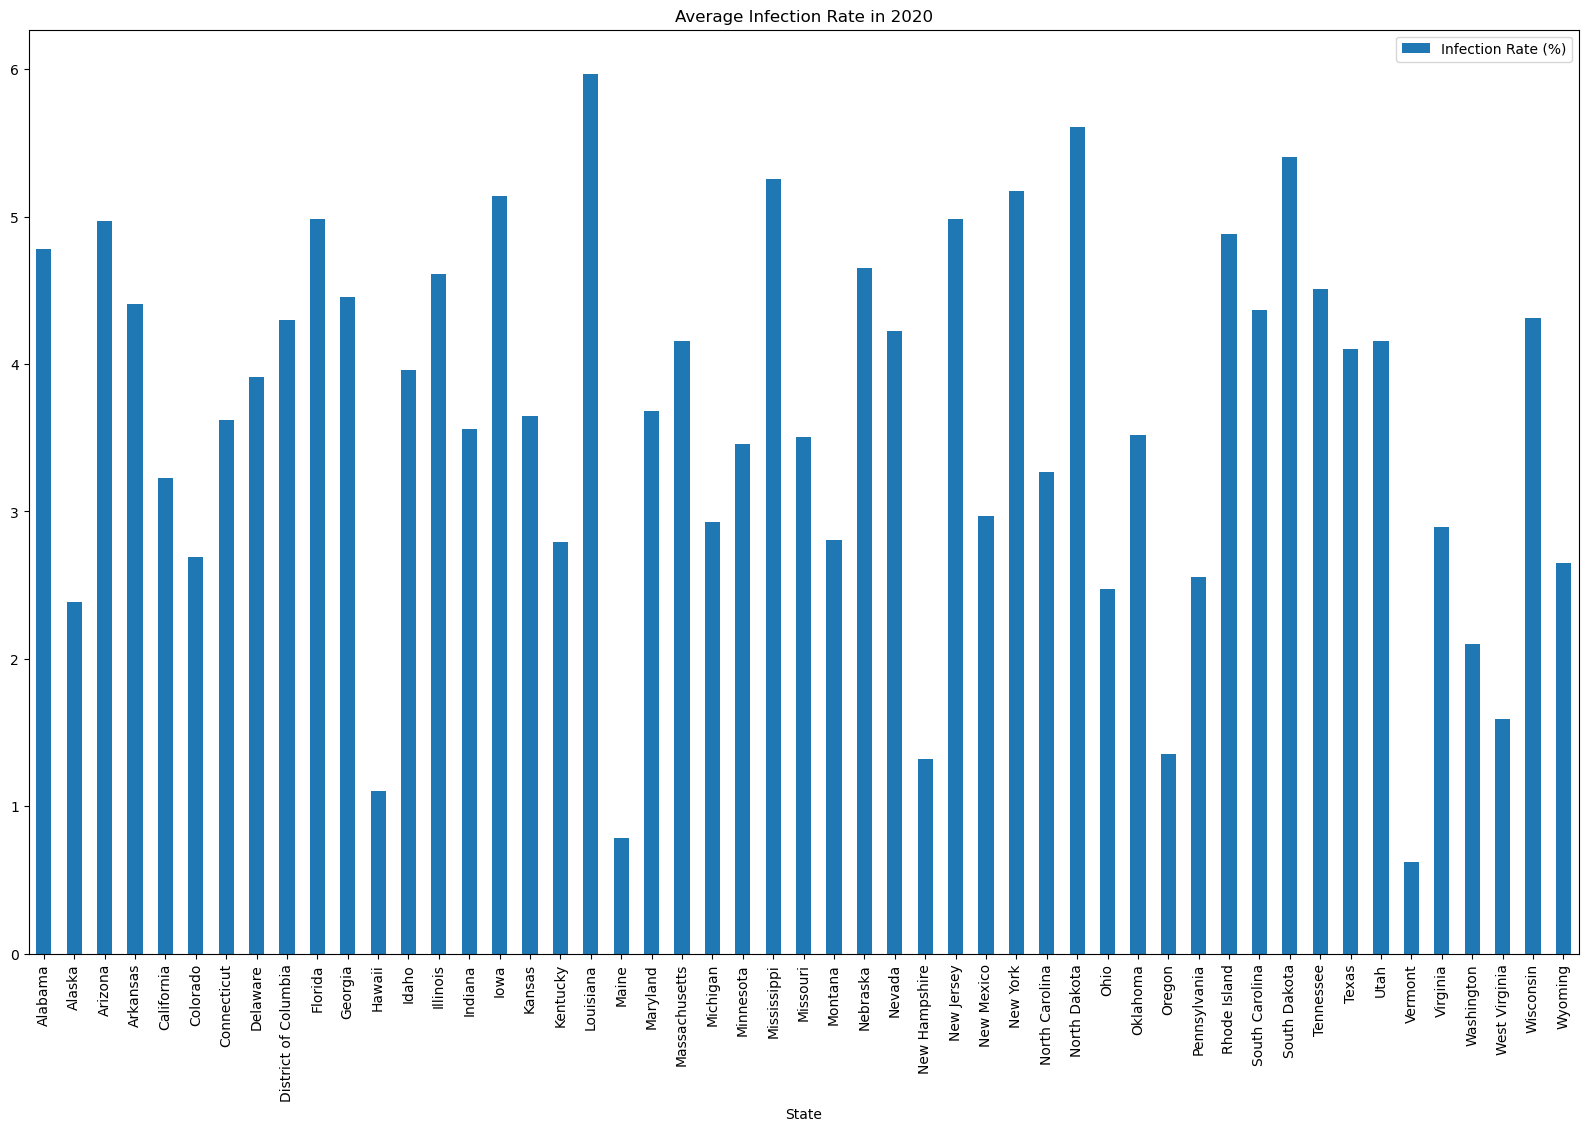

In [ ]:
new_df = states_df
new_df.index = states
new_df

counties_covid_df.drop(counties_covid_df[counties_covid_df["state"] == "Guam"].index, inplace = True)
counties_covid_df.drop(counties_covid_df[counties_covid_df["state"] == "Northern Mariana Islands"].index, inplace = True)
counties_covid_df.drop(counties_covid_df[counties_covid_df["state"] == "Virgin Islands"].index, inplace = True)
counties_covid_df.drop(counties_covid_df[counties_covid_df["state"] == "Puerto Rico"].index, inplace = True)

infection_df = counties_covid_df[["state", "cases", "deaths"]]
inf_gb = infection_df.groupby("state").sum()
inf_gb["population"] = new_df["population"]
inf_gb["Infection Rate (%)"] = inf_gb["cases"] / inf_gb["population"]
inf_gb.plot(y = "Infection Rate (%)", kind = "bar", figsize = (20, 12), title = "Average Infection Rate in 2020", xlabel = "State")

plt.savefig("Infection Rate.png")
plt.show()

# Analysis:
#
# While highly populated states like Texas and California are high up, the states at the top are ones like Louisiana, Alabama, and Mississipi.
# A big reason for this is that those states are very poor compared to the rest of the country.
# These states have high poverty rates, lower income, and worse overall healthcare.
# One other reason is that these states are very right leaning; They are less likely to wear masks, socially distance, or follow other CDC guidelines

In [7]:
c_df = counties_covid_df
c_df["fips"] = c_df["fips"].astype(str)
c_df["fips"] = c_df["fips"].str[:-2]
c_df.sort_values(by = "fips")

county_pop = h.loc[(h["location_key"].str)[:2] == "US"]
county_pop = county_pop.loc[(h["location_key"].str.len() > 5)]
county_pop = county_pop[["location_key", "population"]]
county_pop["location_key"] = county_pop["location_key"].str[6:]
county_pop.loc[county_pop["location_key"].str[0] == "0", "location_key"] = county_pop["location_key"].str[1:]
county_pop.sort_values(by = "location_key")
county_pop.rename(columns = {"location_key" : "fips"}, inplace = True)


In [8]:
county_merge = pd.merge(c_df, county_pop, on = "fips")
county_merge

cmgb_cases = county_merge.groupby("county").sum()
cmgb_pop = county_merge.groupby("county").max()

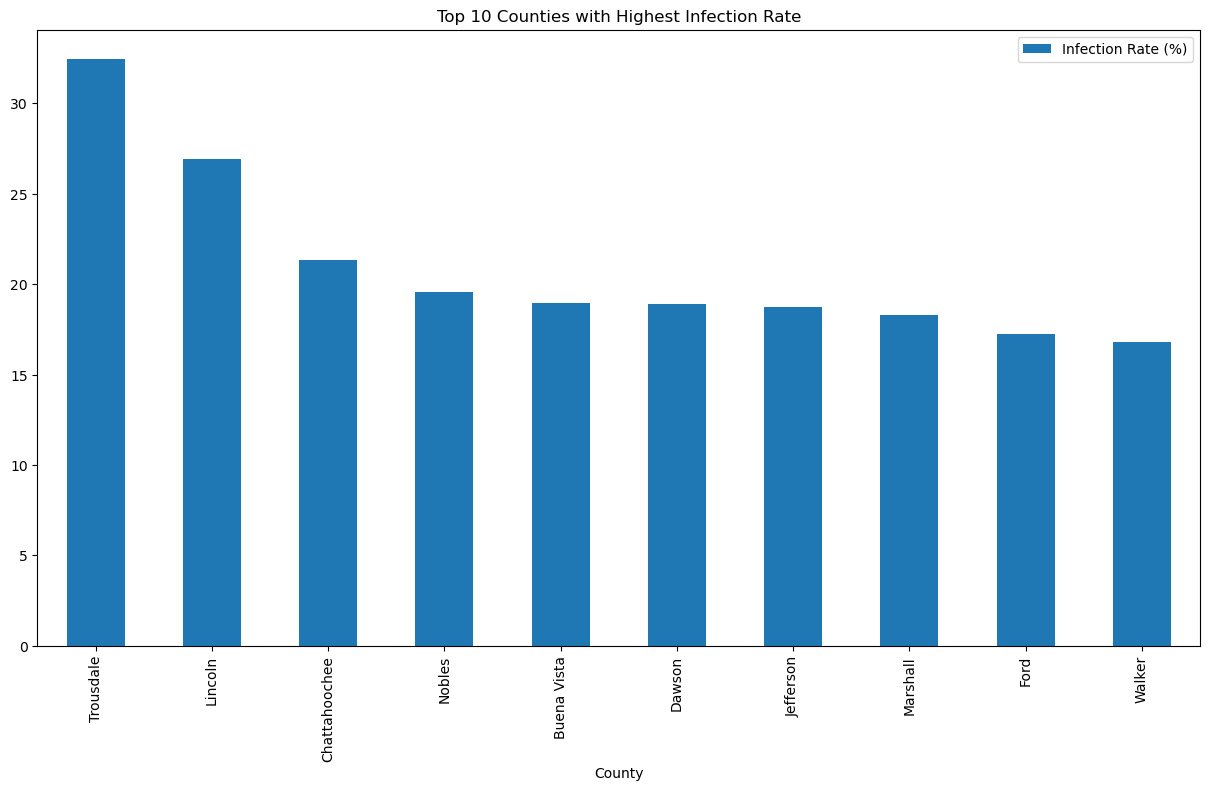

,date,state,fips,cases,deaths,population,Infection Rate (%)
county,,,,,,,
Trousdale,2020-12-05,Tennessee,47169,1934,12.0,10831.0,32.440126
Lincoln,2020-12-05,Wyoming,8073,5715,67.0,82557.0,26.939605
Chattahoochee,2020-12-05,Georgia,13053,2044,4.0,10205.0,21.361587
Nobles,2020-12-05,Minnesota,27105,3210,34.0,21671.0,19.543537
Buena Vista,2020-12-05,Iowa,19021,3207,14.0,20144.0,18.962569
Dawson,2020-12-05,Texas,48115,2140,37.0,24406.0,18.881668
Jefferson,2020-12-05,Wisconsin,8059,41452,631.0,769828.0,18.715659
Marshall,2020-12-05,West Virginia,54051,7063,58.0,95572.0,18.310844
Ford,2020-12-05,Kansas,20057,4747,25.0,34218.0,17.228505


In [9]:
cmgb_pop.head()

cmgb_final = cmgb_pop
cmgb_final["Infection Rate (%)"] = cmgb_cases["cases"] / cmgb_final["population"]

cmgb_final.head()
cmgb_final = cmgb_final.nlargest(10, "Infection Rate (%)")

cmgb_final.plot(y = "Infection Rate (%)" , kind = "bar", figsize = (15, 8))
plt.title("Top 10 Counties with Highest Infection Rate")
plt.xlabel("County")
plt.savefig("Top 10 Counties with Highest Infection Rate")
plt.show()
cmgb_final.head(10)

# Analysis:
# The general trend for these cities is that they have populations of around 10,000 - 20,000 and are very republican.
# The counties that aren't extremely Republican also tend to have a higher poverty rate.

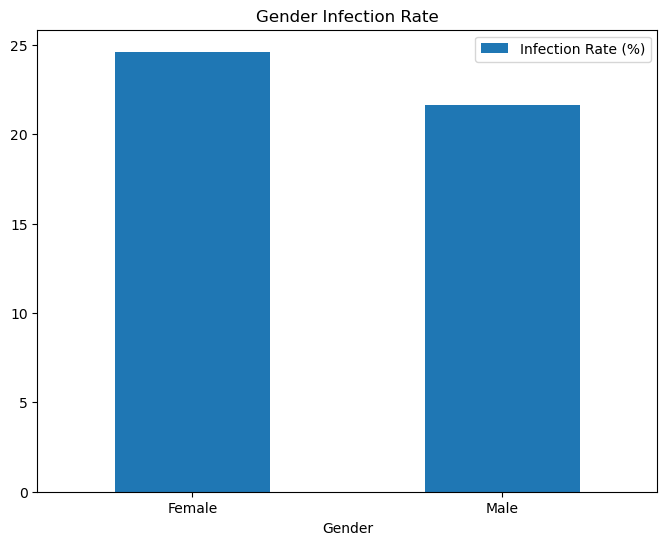

In [10]:
gender_csv = "../Project 1/Data/by-sex.csv"
gender_df = pd.read_csv(gender_csv)

us_gender = gender_df.loc[gender_df["location_key"] == "US"]
us_gender = us_gender[["location_key", "new_confirmed_male", "new_confirmed_female", "cumulative_confirmed_male", "cumulative_confirmed_female"]]
us_gb = us_gender.groupby("location_key").max()
us_gb.head()

temp_gb = us_data.groupby("location_key").max()

us_gb["Male Infection Rate"] = us_gb["cumulative_confirmed_male"].astype(int) / temp_gb["population_male"].astype(int) * 100
us_gb["Female Infection Rate"] = us_gb["cumulative_confirmed_female"].astype(int) / temp_gb["population_female"].astype(int) * 100
us_gb

final_gender = {"Gender" : ["Male", "Female"], "Infection Rate (%)" : [us_gb.iloc[0,4], us_gb.iloc[0,5]]}
fg_df = pd.DataFrame(final_gender)
fg_gb = fg_df.groupby("Gender").max()

fg_gb.plot(y = "Infection Rate (%)", kind = "bar", figsize = (8, 6), rot = 0)
plt.title("Gender Infection Rate")
plt.savefig("Gender Infection Rate")

# Analysis:
#
# The infection rate between men and women are very close, but women barely have a larger rate of infection.
# The difference is nearly negligible, but a possible reason could be an influx of people needing caregiving services, which is a job populated by mostly women

In [11]:
age_csv = "../Project 1/Data/by-age.csv"
age_df = pd.read_csv(age_csv)

us_age = age_df.loc[age_df["location_key"] == "US"]


C:\Users\eessd\AppData\Local\Temp\ipykernel_89996\159307458.py:2: DtypeWarning: Columns (148,149,150,151) have mixed types. Specify dtype option on import or set low_memory=False.
  age_df = pd.read_csv(age_csv)


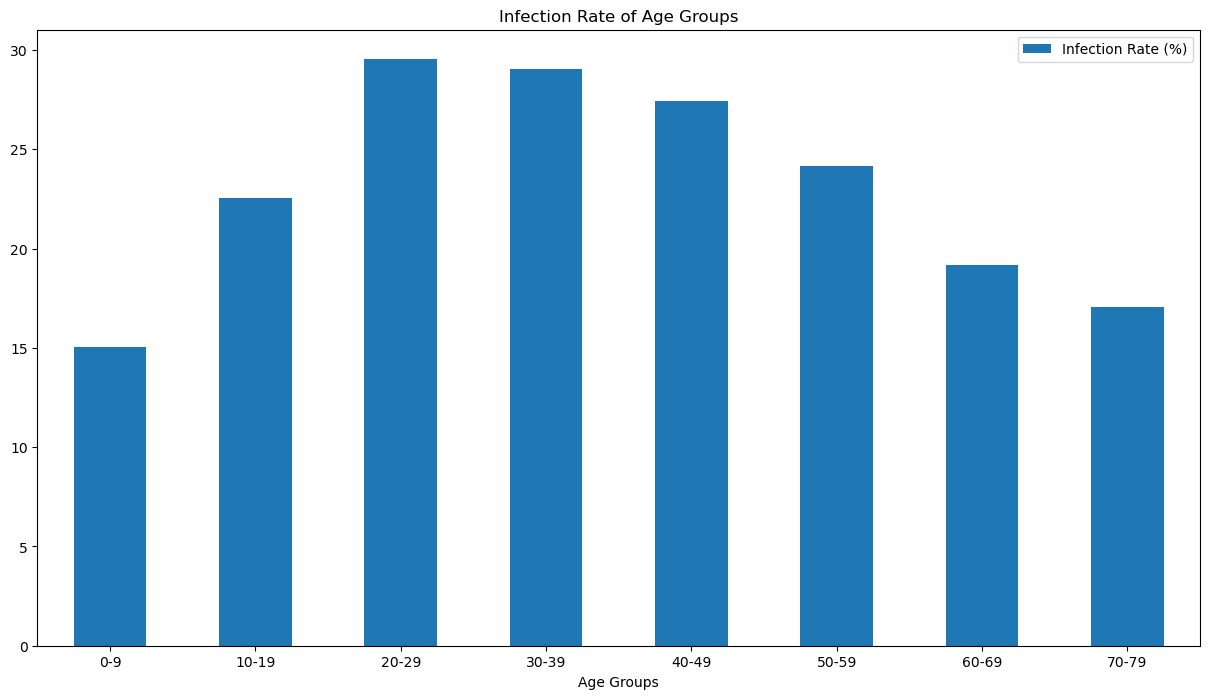

In [12]:
us_age_gb = us_age.groupby("location_key").max()
us_age_gb = us_age_gb[["cumulative_confirmed_age_0", "cumulative_confirmed_age_1", "cumulative_confirmed_age_2", "cumulative_confirmed_age_3", "cumulative_confirmed_age_4", "cumulative_confirmed_age_5", "cumulative_confirmed_age_6", "cumulative_confirmed_age_7", "age_bin_0", "age_bin_1", "age_bin_2", "age_bin_3", "age_bin_4", "age_bin_5", "age_bin_6", "age_bin_7"]]
us_age_gb.head()

final_age = {"Age Groups" : ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79"], "Cumulative Infected" : [us_age_gb.iloc[0, 0], us_age_gb.iloc[0, 1], us_age_gb.iloc[0, 2], us_age_gb.iloc[0, 3], us_age_gb.iloc[0, 4], us_age_gb.iloc[0, 5], us_age_gb.iloc[0, 6],  us_age_gb.iloc[0, 7]], "Population" : [us_data.iloc[0, 4], us_data.iloc[0, 5], us_data.iloc[0, 6], us_data.iloc[0, 7], us_data.iloc[0, 8], us_data.iloc[0, 9], us_data.iloc[0, 10], us_data.iloc[0, 11]]}
final_age_df = pd.DataFrame(final_age)

final_age_df["Infection Rate (%)"] = final_age_df["Cumulative Infected"] / final_age_df["Population"] * 100
final_age_gb = final_age_df.groupby("Age Groups").max()
final_age_gb.plot(y = "Infection Rate (%)", kind = "bar", figsize = (15, 8), rot = 0)
plt.title("Infection Rate of Age Groups")
plt.savefig("Infection Rate of Age Groups")
plt.show()

# Analysis:
#
# The age group with the highest rate is the 20 - 29 year olds, with the 30's and the 40's following.
# This makes sense given that young adults are the most likely to go to parties and other large social super-spreader events

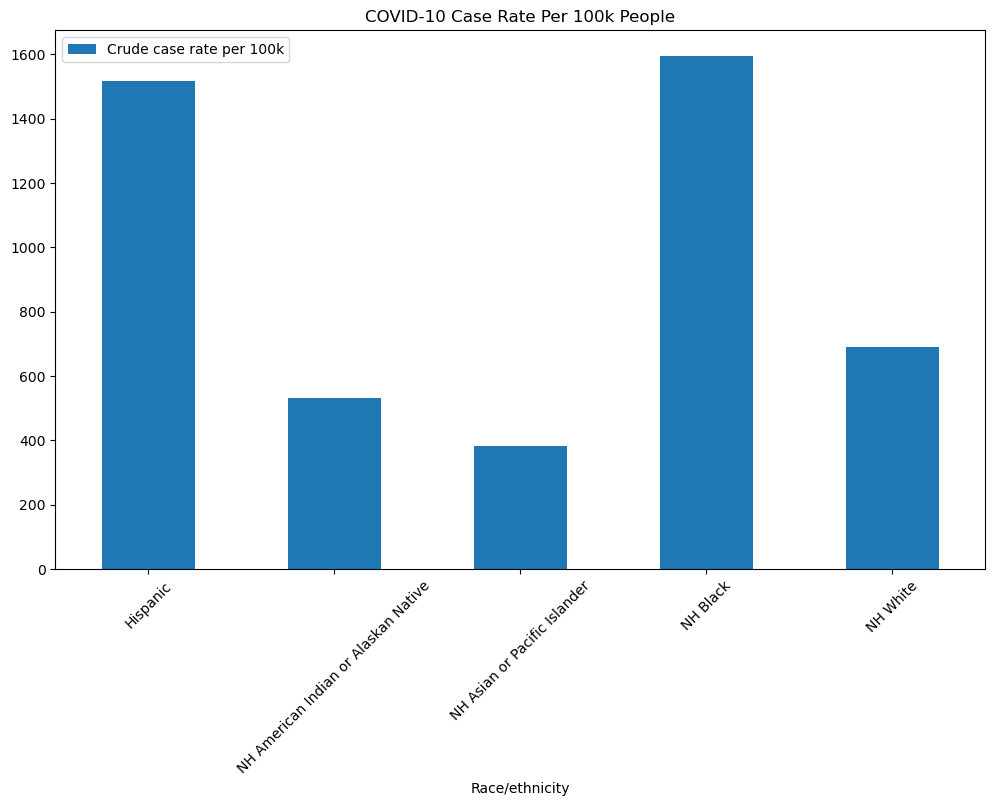

In [13]:
race_csv = "../Project 1/Data/COVID-19_Cases_and_Deaths_by_Race_Ethnicity.csv"
race_df = pd.read_csv(race_csv)

race_df.drop(race_df[race_df["Race/ethnicity"] == "NH Asian"].index, inplace = True)
race_df.drop(race_df[race_df["Race/ethnicity"] == "NH Multiracial"].index, inplace = True)
race_df.drop(race_df[race_df["Race/ethnicity"] == "NH Other"].index, inplace = True)
race_df.drop(race_df[race_df["Race/ethnicity"] == "Unknown"].index, inplace = True)

race_gb = race_df.groupby("Race/ethnicity").max()
race_gb.head(10)
race_gb.plot(y = "Crude case rate per 100k", kind = "bar", figsize = (12, 7), rot = 45)
plt.savefig("COVID-10 Case Rate Per 100k People")
plt.title("COVID-10 Case Rate Per 100k People")
plt.show()

# Analysis:
#
# Hispanic and Black communities were hit considerably harder than any other race.
# This makes sense given how those communites often experience economic and social disparities.

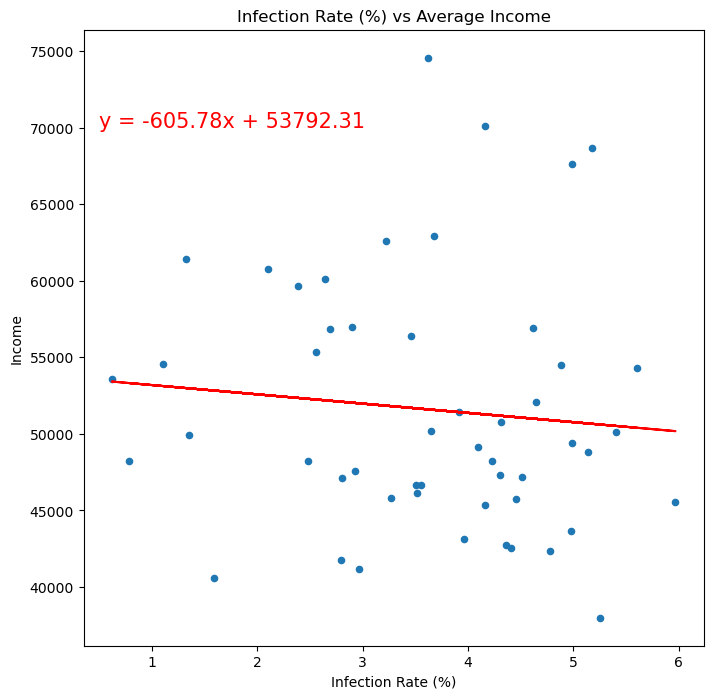

In [15]:
income_csv = "../Project 1/Data/COVID19_state.csv"
income_df = pd.read_csv(income_csv)
income_df = income_df[["State", "Income", "GDP"]]
income_df.sort_values("State")
income_df.index = income_df["State"] 

income_df["Infection Rate (%)"] = inf_gb["Infection Rate (%)"]
income_df = income_df[["Income", "GDP", "Infection Rate (%)"]]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(income_df["Infection Rate (%)"], income_df["Income"])
regress_values = income_df["Infection Rate (%)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

income_df.plot(x = "Infection Rate (%)", y = "Income", kind = "scatter", figsize = (8, 8))
plt.plot(income_df["Infection Rate (%)"], regress_values, "r-")
plt.annotate(line_eq, xy = (0.5, 70000), fontsize=15, color="red", annotation_clip = False)
plt.title("Infection Rate (%) vs Average Income")
plt.savefig("Infection Rate (%) vs Average Income")
plt.show()

# Analysis:
# Only a very slight correlation here. 
# It trends downward like we speculated it would, but not as much.
# Most likely the range of incomes in each state is too vast for a graph like this to make sense in this context.

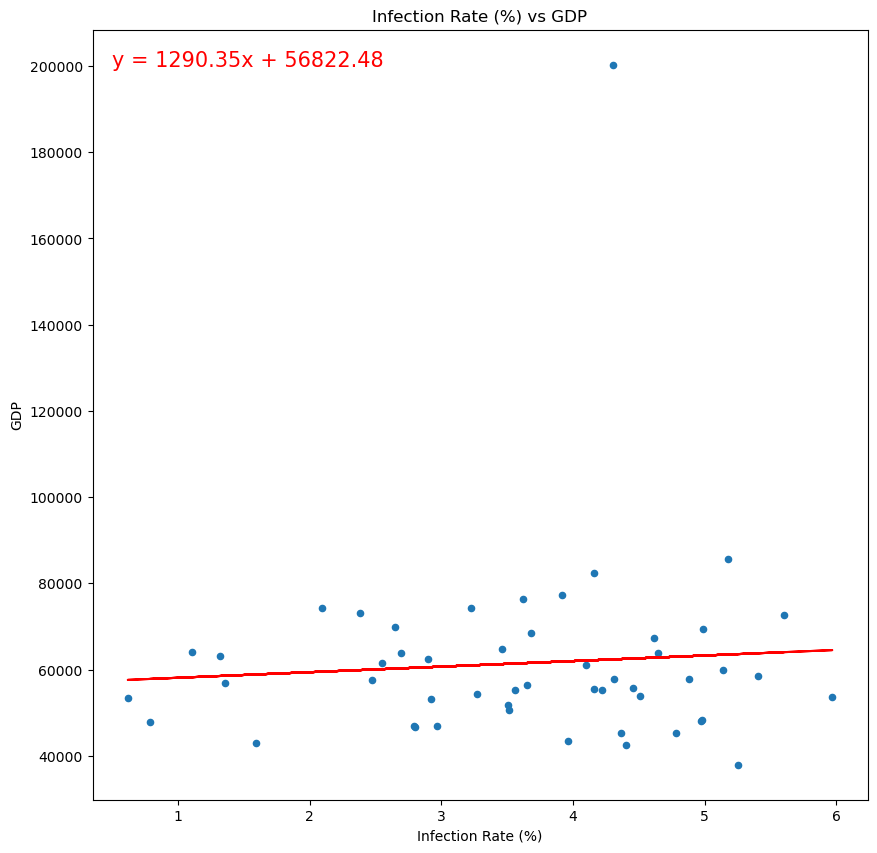

In [16]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(income_df["Infection Rate (%)"], income_df["GDP"])
regress_values = income_df["Infection Rate (%)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


income_df.plot(x = "Infection Rate (%)", y = "GDP", kind = "scatter", figsize = (10, 10))
plt.annotate(line_eq, xy = (0.5, 200000), fontsize=15, color="red", annotation_clip = False, textcoords = 'data')
plt.plot(income_df["Infection Rate (%)"], regress_values, "r-")
plt.title("Infection Rate (%) vs GDP")
plt.savefig("Infection Rate (%) vs GDP")
plt.show()

# Analysis:
# Again, not as much of a correlation as I thought there would be, the regression line is almost flat. 
# Given some of the charts from earlier, I think that this chart and the previous are not the best to use when regarding economic factors in this scenario
# Also, the outlier at the top is Washington D.C. (Of course, being because it is the capitol of the country)